In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[('Snap-2331.jpg', 158.37517843364196), ('Snap-2303.jpg', 220.9424643132716), ('Snap-2326.jpg', 190.57886911651235), ('Snap-2338.jpg', 154.15188994984567), ('Snap-2183.jpg', 192.29448061342592), ('Snap-2229.jpg', 135.5425419560185), ('Snap-2260.jpg', 136.59856577932098), ('Snap-2292.jpg', 162.6002522183642), ('Snap-2265.jpg', 156.42538676697532), ('Snap-2314.jpg', 181.70186197916667), ('Snap-2264.jpg', 181.91839313271606), ('Snap-2196.jpg', 189.312890625), ('Snap-2233.jpg', 222.00573350694444), ('Snap-2286.jpg', 155.74148003472223), ('Snap-2162.jpg', 170.72923177083334), ('Snap-2194.jpg', 192.5601345486111), ('Snap-2195.jpg', 187.62502266589507), ('Snap-2163.jpg', 170.46664158950617), ('Snap-2245.jpg', 136.05002604166665), ('Snap-2230.jpg', 133.04914255401235), ('Snap-2344.jpg', 185.98392264660495), ('Snap-2236.jpg', 217.8053342013889), ('Snap-2316.jpg', 132.47816213348764), ('Snap-2132.jpg', 167.67108458719136), ('Snap-2330.jpg', 168.55230179398148), ('Snap-2174.jpg', 180.773420138888

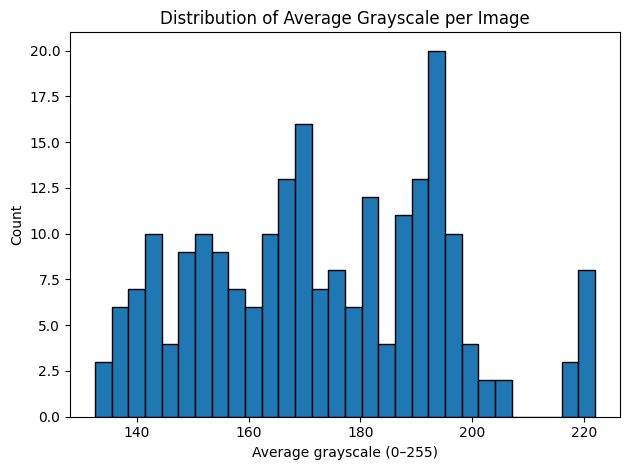

In [3]:
file_path = 'dataset/heat_treatment/image/'

# collect image paths (common extensions)
image_path_list = [os.path.join(file_path, f) for f in os.listdir(file_path)]

data = []
avg_vals = []

for image_path in image_path_list:
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"⚠️ Skipping unreadable file: {image_path}")
        continue
    avg_gray = img.mean()# 0–255
    filename = os.path.basename(image_path)
    data.append((filename, avg_gray))
    avg_vals.append(avg_gray)

print(data)

avg_vals = np.array(avg_vals, dtype=float)
if len(avg_vals) == 0:
    raise ValueError("No valid images found to plot.")

# quick stats
print(f"\nCount: {len(avg_vals)}")
print(f"Min / Max: {avg_vals.min():.2f} / {avg_vals.max():.2f}")
print(f"Mean ± Std: {avg_vals.mean():.2f} ± {avg_vals.std(ddof=1):.2f}")
print(f"Median: {np.median(avg_vals):.2f}")

# histogram
plt.figure()
plt.hist(avg_vals, bins=30, edgecolor='black')
plt.xlabel('Average grayscale (0–255)')
plt.ylabel('Count')
plt.title('Distribution of Average Grayscale per Image')
plt.tight_layout()
plt.show()

In [3]:
df = pd.DataFrame(data, columns=['image_name', 'avg_gray_value'])

df.to_csv('average_gray_values.csv', index=False)

print("✅ Saved to average_gray_values.csv")

✅ Saved to average_gray_values.csv
